In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
pip install split-folders[full]

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/Datasets/plant_village_potato_grape', output="/content/drive/MyDrive/Datasets/plant_village_potato_grape_keras", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 6214 files [21:41,  4.77 files/s]


In [ ]:
train_path='/content/drive/MyDrive/Datasets/plant_village_potato_grape_keras/train'
test_path='/content/drive/MyDrive/Datasets/plant_village_potato_grape_keras/test'
val_path='/content/drive/MyDrive/Datasets/plant_village_potato_grape_keras/val'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4969 images belonging to 7 classes.
Found 620 images belonging to 7 classes.
Found 625 images belonging to 7 classes.


In [ ]:
imgs, labels= next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

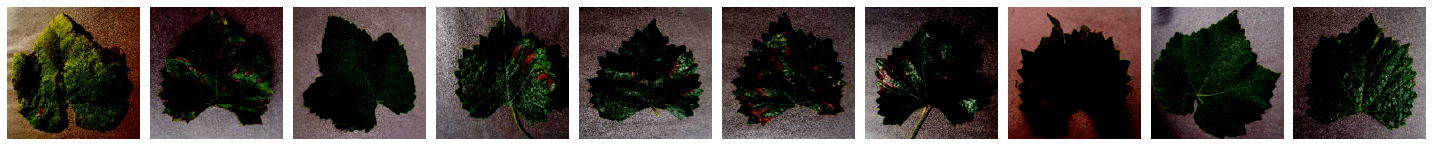

[[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(units=2, activation='softmax')
# ])

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
x = mobile.layers[-6].output

In [ ]:
hidden=tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
output = Dense(units=7, activation='softmax')(hidden)

In [ ]:
model =Model(inputs=mobile.input, outputs=output)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
history=model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Epoch 1/10
497/497 [==============================] - 38s 72ms/step - loss: 0.1922 - accuracy: 0.9358 - val_loss: 0.0495 - val_accuracy: 0.9839
Epoch 2/10
497/497 [==============================] - 35s 70ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0357 - val_accuracy: 0.9903
Epoch 3/10
497/497 [==============================] - 34s 69ms/step - loss: 0.0231 - accuracy: 0.9944 - val_loss: 0.0319 - val_accuracy: 0.9887
Epoch 4/10
497/497 [==============================] - 31s 62ms/step - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.0259 - val_accuracy: 0.9935
Epoch 5/10
497/497 [==============================] - 32s 64ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.0461 - val_accuracy: 0.9823
Epoch 6/10
497/497 [==============================] - 33s 66ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0176 - val_accuracy: 0.9952
Epoch 7/10
497/497 [==============================] - 33s 67ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0544 - val_accuracy:

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

63/63 [==============================] - 4s 53ms/step


In [ ]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'Grape___Black_rot': 0,
 'Grape___Esca_(Black_Measles)': 1,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 2,
 'Grape___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6}

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[115   3   0   0   0   0   0]
 [  0 139   0   0   0   0   0]
 [  0   0 109   0   0   0   0]
 [  0   0   0  43   0   0   0]
 [  0   0   0   0 100   0   0]
 [  0   0   0   0   0  98   2]
 [  0   0   0   0   0   2  14]]


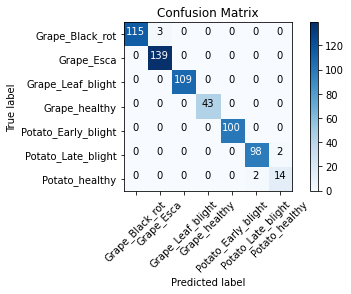

In [ ]:
cm_plot_labels = ['Grape_Black_rot','Grape_Esca','Grape_Leaf_blight','Grape_healthy','Potato_Early_blight','Potato_Late_blight','Potato_healthy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
score=model.evaluate(test_batches)

63/63 [==============================] - 3s 54ms/step - loss: 0.0324 - accuracy: 0.9888


In [ ]:
model.save('/content/drive/MyDrive/Models/Model_Potato_Grape_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Model_Potato_Grape_2/assets


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

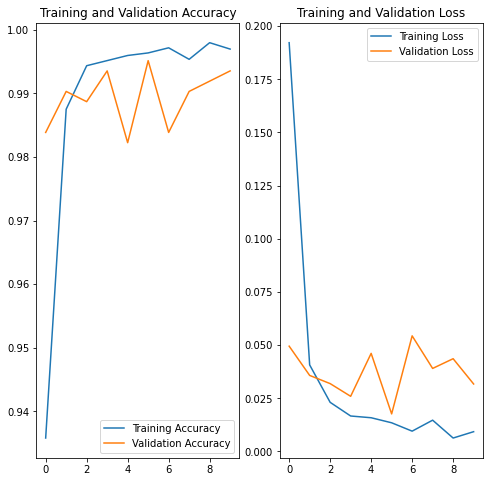

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()